<a href="https://colab.research.google.com/github/ashleyliang08/IBM-Data-Analyst-PC-Tech-In-Demand-Analysis/blob/main/lab18%20-%20Stacked_Charts(%E9%87%8D%E8%A6%81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [ ]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-09-12 08:25:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  48.1MB/s    in 3.2s    

2025-09-12 08:25:36 (48.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [ ]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [ ]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



In [ ]:
!pip install seaborn
import seaborn as sns

/tmp/ipykernel_359/2546480765.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_scores = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()


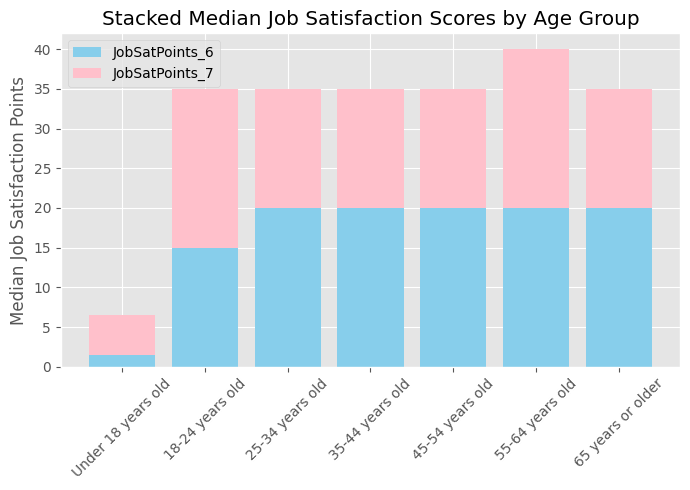

In [ ]:
##Write your code here
# Ensure Age is categorical and ordered
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Aggregate median job satisfaction scores by age group
median_scores = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()

# Plot stacked bar chart
plt.figure(figsize=(7,5))
plt.bar(median_scores['Age'], median_scores['JobSatPoints_6'], label='JobSatPoints_6',color = 'skyblue')
plt.bar(median_scores['Age'], median_scores['JobSatPoints_7'], bottom=median_scores['JobSatPoints_6'], label='JobSatPoints_7',color = 'pink')

plt.xticks(rotation=45)
plt.ylabel('Median Job Satisfaction Points')
plt.title('Stacked Median Job Satisfaction Scores by Age Group')
plt.legend()
plt.tight_layout()
plt.show()



##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_359/1656903224.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 700x500 with 0 Axes>

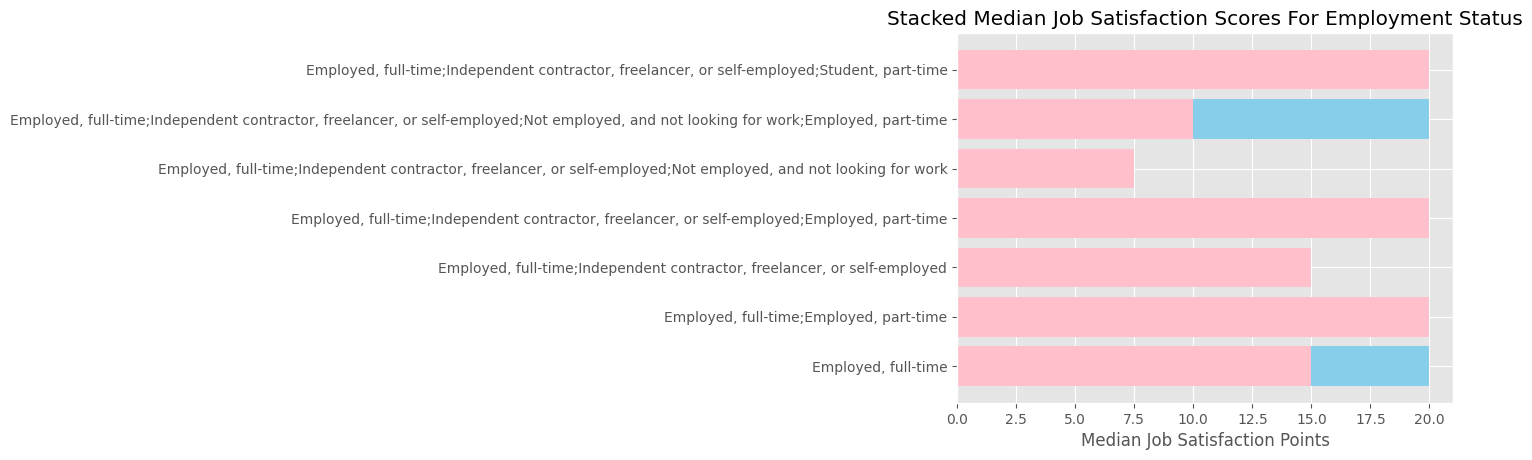

In [ ]:
##Write your code here
df_emp_jobsat = df.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna(subset = ['JobSatPoints_6', 'JobSatPoints_7']).reset_index().head(7)
df_emp_jobsat
# Plot stacked bar chart
plt.figure(figsize=(7,5))
fig,ax = plt.subplots()
ax.barh(df_emp_jobsat['Employment'], df_emp_jobsat['JobSatPoints_6'],
        label='JobSatPoints_6',color = 'skyblue')
ax.barh(df_emp_jobsat['Employment'], df_emp_jobsat['JobSatPoints_7'],
        label='JobSatPoints_7',color = 'pink')

plt.xlabel('Median Job Satisfaction Points')
plt.title('Stacked Median Job Satisfaction Scores For Employment Status')
plt.tight_layout()
plt.show()

/tmp/ipykernel_359/483613030.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels = labels,fontsize =16)


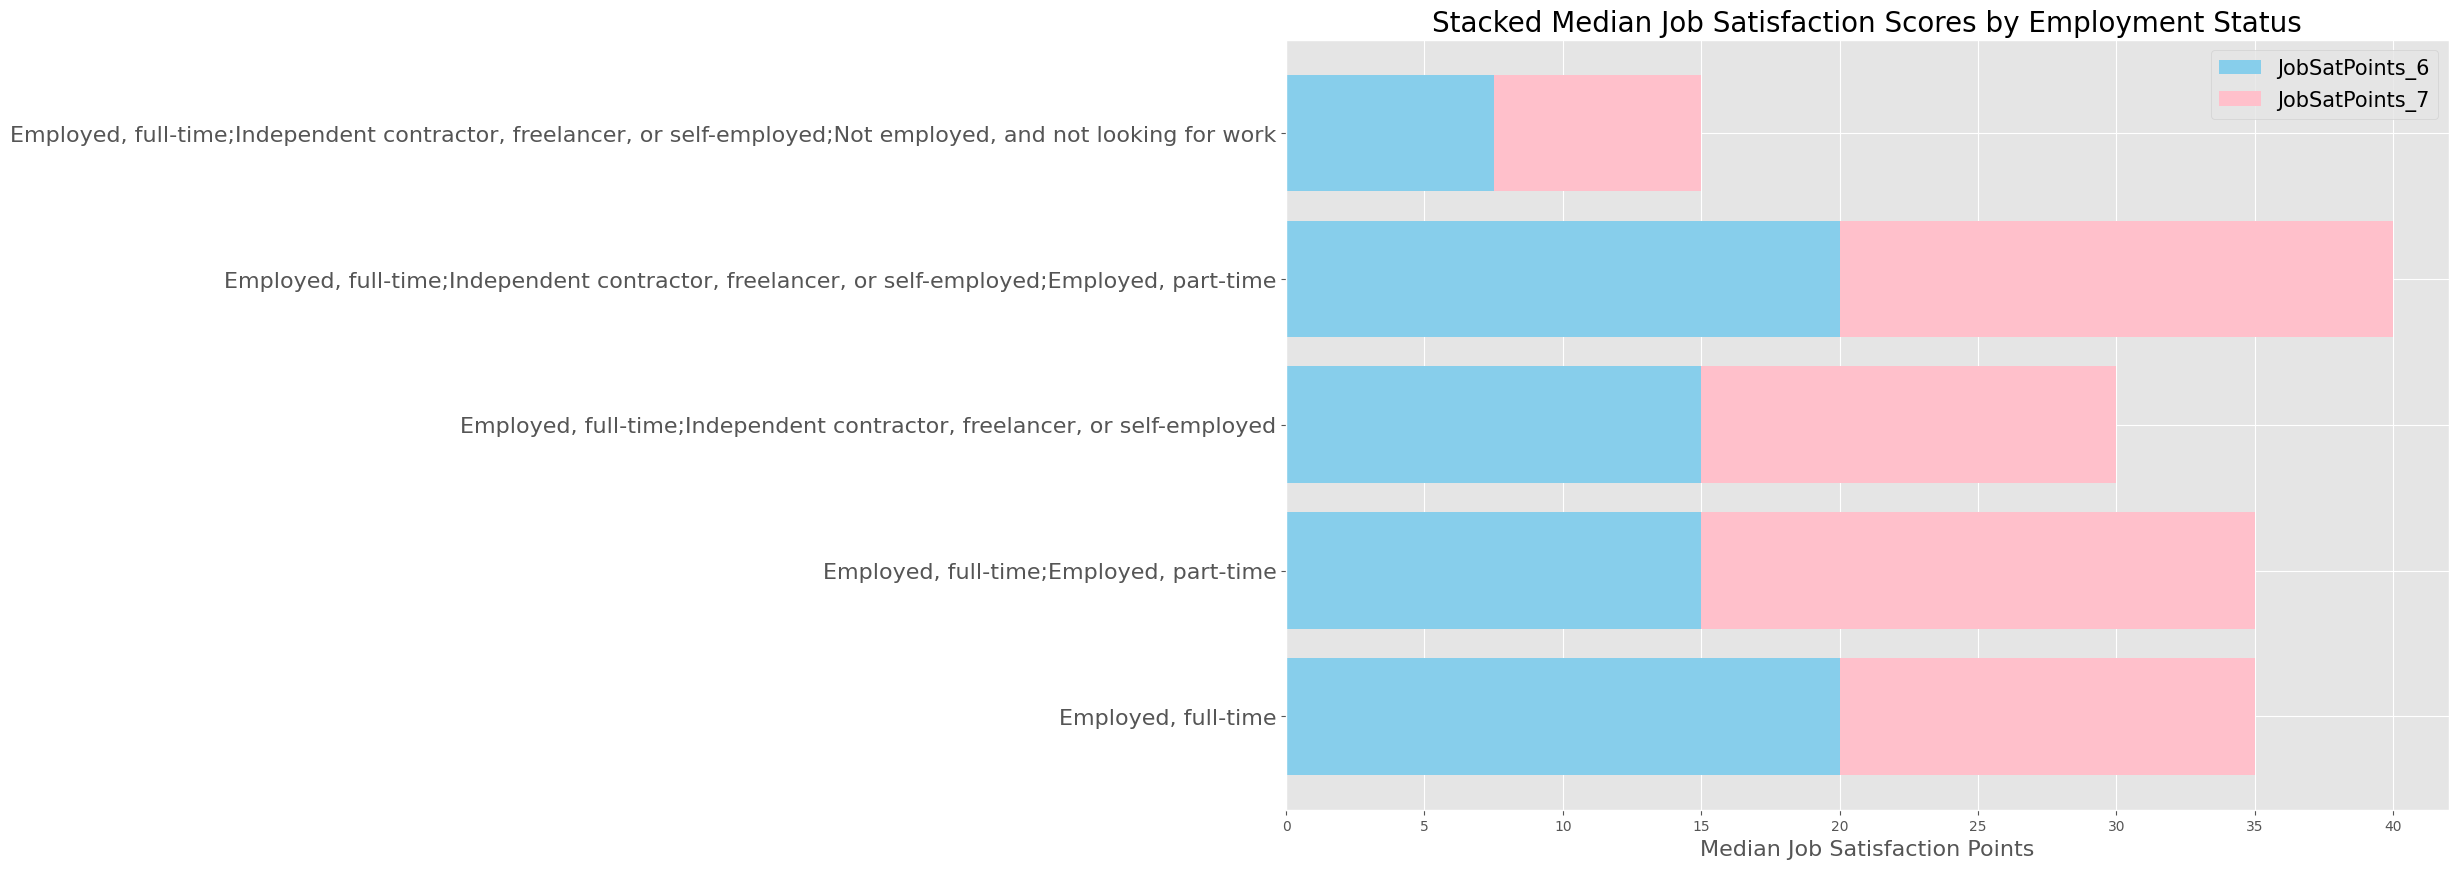

In [ ]:
#fetch data
df_emp_jobsat = df.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna().reset_index().head()
labels = list(df.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna().head().index)
#plot
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(df_emp_jobsat['Employment'], df_emp_jobsat['JobSatPoints_6'],
        label='JobSatPoints_6', color='skyblue')
ax.barh(df_emp_jobsat['Employment'], df_emp_jobsat['JobSatPoints_7'],
        left=df_emp_jobsat['JobSatPoints_6'], label='JobSatPoints_7', color='pink')
ax.set_yticklabels(labels = labels,fontsize =16)
ax.set_xlabel('Median Job Satisfaction Points',fontsize = 16)
ax.set_title('Stacked Median Job Satisfaction Scores by Employment Status',fontsize = 20)
ax.legend(fontsize = 15)
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


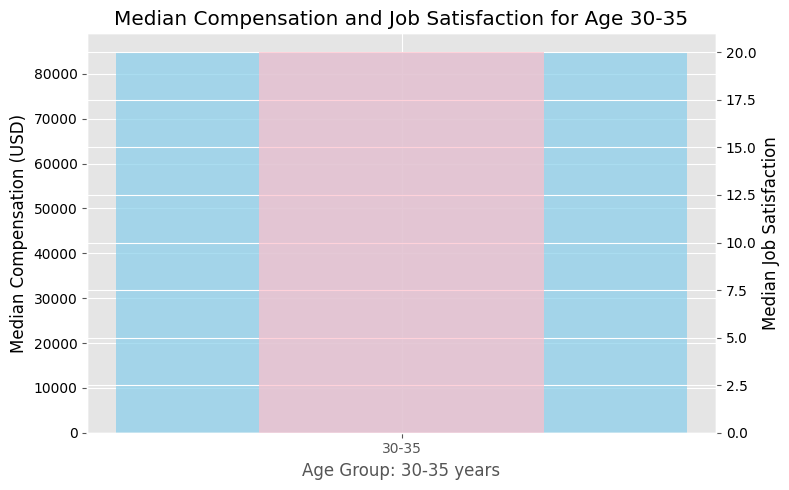

In [ ]:
import matplotlib.pyplot as plt

# 筛选年龄在30-44岁的数据
age_group = ['30-34 years old', '35-44 years old']
df_30_35 = df[df['Age'].isin(age_group)]

# 计算中位数
comp_sat = df_30_35[['ConvertedCompYearly', 'JobSatPoints_6']].median().dropna().reset_index()
comp_sat.columns = ['Metric', 'MedianValue']

fig, ax1 = plt.subplots(figsize=(8,5))

# 左侧Y轴 - 薪酬
color1 = 'skyblue'
ax1.set_xlabel('Age Group: 30-35 years')
ax1.set_ylabel('Median Compensation (USD)', color='k')
compensation = comp_sat.loc[comp_sat['Metric'] == 'ConvertedCompYearly', 'MedianValue'].values[0]
ax1.bar('30-35', compensation, color=color1, alpha=0.7)
ax1.tick_params(axis='y', labelcolor='k')

# 右侧Y轴 - 工作满意度
ax2 = ax1.twinx()
color2 = 'pink'
ax2.set_ylabel('Median Job Satisfaction', color='k')
jobsat = comp_sat.loc[comp_sat['Metric'] == 'JobSatPoints_6', 'MedianValue'].values[0]
ax2.bar('30-35', jobsat, color=color2, alpha=0.7, width=0.4)
ax2.tick_params(axis='y', labelcolor='k')

plt.title('Median Compensation and Job Satisfaction for Age 30-35')
plt.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_359/4084946920.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_scores = df.groupby('Age')[['ConvertedCompYearly', 'JobSat']].median().reset_index()


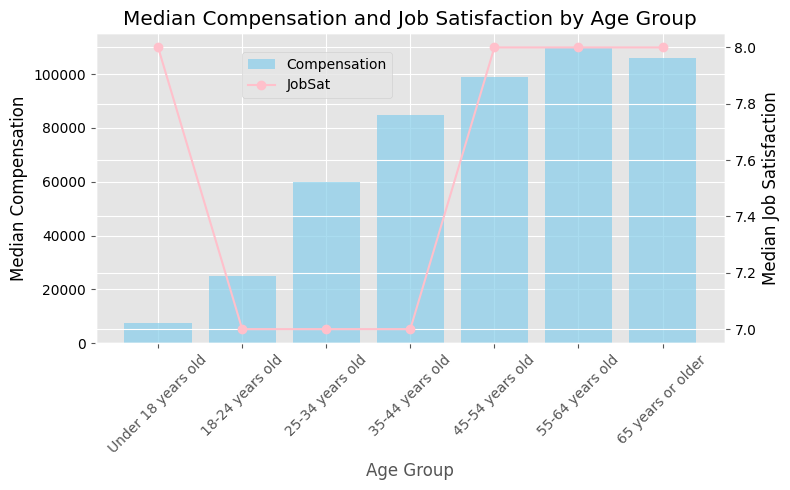

In [ ]:
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# 计算每个年龄组的中位数
median_scores = df.groupby('Age')[['ConvertedCompYearly', 'JobSat']].median().reset_index()

#plot
fig, ax1 = plt.subplots(figsize=(8,5))
color1 = 'skyblue'
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Median Compensation', color='k')
ax1.bar(median_scores['Age'], median_scores['ConvertedCompYearly'], color=color1, alpha=0.7, label='Compensation')
ax1.tick_params(axis='y', labelcolor='k')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
color2 = 'pink'
ax2.set_ylabel('Median Job Satisfaction', color='k')
ax2.plot(median_scores['Age'], median_scores['JobSat'], color=color2, marker='o', label='JobSat')
ax2.tick_params(axis='y', labelcolor='k')


plt.title('Median Compensation and Job Satisfaction by Age Group')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(.3, 0.9))
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


In [ ]:
!pip install seaborn
import seaborn as sns

/tmp/ipykernel_359/3192047847.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  db_age_counts = df_age_db.groupby(['Age', 'DB_wanto']).size().reset_index(name='Frequency')


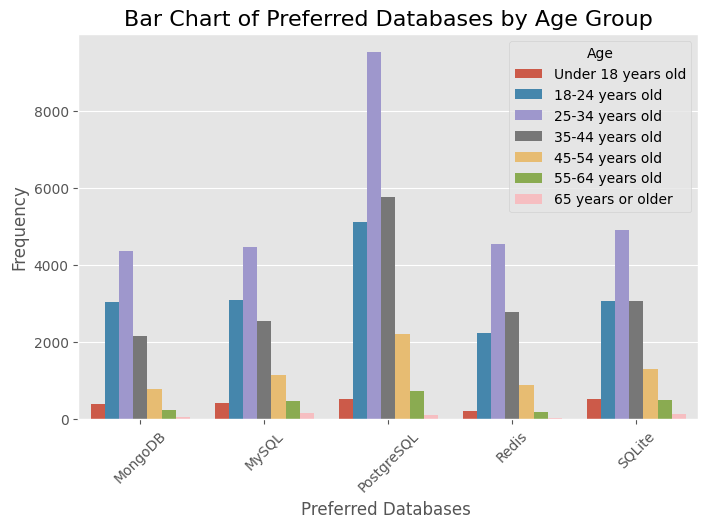

In [ ]:
##Write your code here
#fetch data
# 先处理缺失值，然后拆分db
df_db_expanded = df.dropna(subset=['DatabaseWantToWorkWith', 'Age']).copy()
df_db_expanded['DB_wanto'] = df_db_expanded['DatabaseWantToWorkWith'].str.split(';')
df_db_expanded = df_db_expanded.explode('DB_wanto')  # 将一行中的db拆分多行

# 2. 获取最受欢迎的前5种语言
top_5_db = df_db_expanded['DB_wanto'].value_counts().head(5).index.tolist()
# 3. 筛选出前5种语言的数据，并按年龄和语言分组计算频率
df_age_db = df_db_expanded[df_db_expanded['DB_wanto'].isin(top_5_db)]
db_age_counts = df_age_db.groupby(['Age', 'DB_wanto']).size().reset_index(name='Frequency')

# 4. 设置年龄顺序（确保绘图时按正确顺序显示）
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
]
db_age_counts ['Age'] = pd.Categorical(db_age_counts['Age'], categories=age_order, ordered=True)

#plot
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize = (8,5))
sns.barplot(
    data=db_age_counts,
    x='DB_wanto',
    y= 'Frequency',
    hue='Age',
)
plt.title('Bar Chart of Preferred Databases by Age Group',fontsize = 16)
plt.xlabel('Preferred Databases ')
plt.xticks(rotation = 45)
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


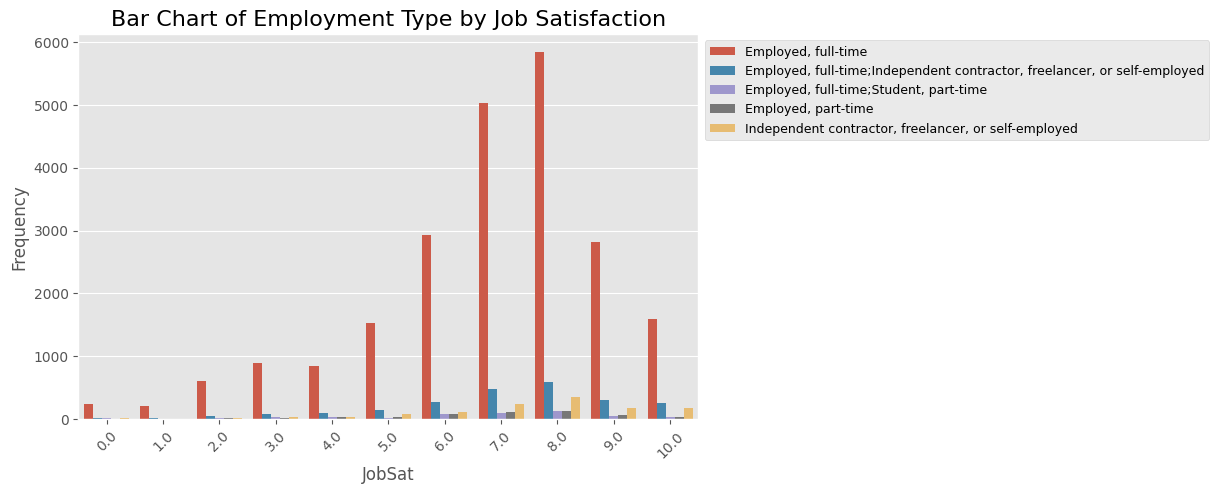

In [ ]:
##Write your code here
#fetch data
df_emp_jobsat = df.dropna(subset=['Employment', 'JobSat']).copy()
top_5_emp = df_emp_jobsat['Employment'].value_counts().head().index.tolist()
df_emp_count = df_emp_jobsat[df_emp_jobsat['Employment'].isin(top_5_emp)]
df_emp_counts = df_emp_count.groupby(['Employment','JobSat']).size().reset_index(name='Frequency')
df_emp_counts
#plot
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize = (8,5))
sns.barplot(
    data=df_emp_counts ,
    x='JobSat',
    y= 'Frequency',
    hue='Employment'
)
plt.title('Bar Chart of Employment Type by Job Satisfaction',fontsize =16)
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor = (1,1),loc = 'upper left',fontsize = 9)
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


/tmp/ipykernel_359/2975166016.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_lang_counts = df_lang_count.groupby(['Age','Lang_pre']).size().reset_index(name='Frequency')


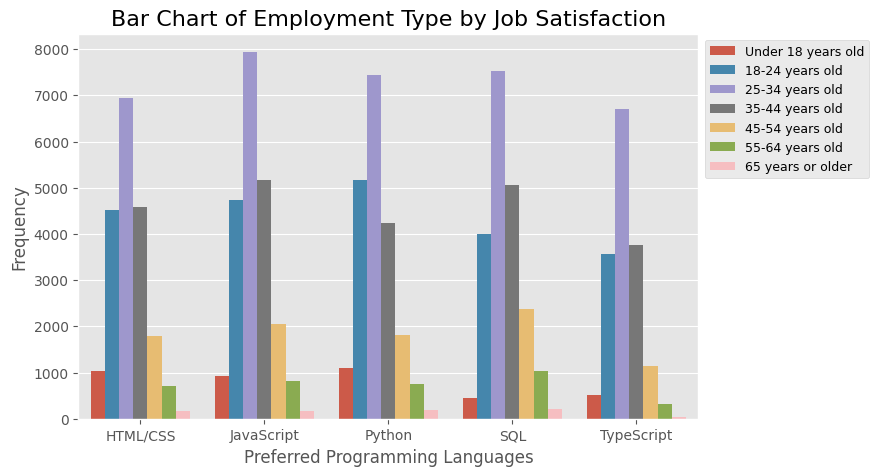

In [ ]:
##Write your code here

df_age_lang = df.dropna(subset=['LanguageAdmired', 'Age']).copy()
df_age_lang['Lang_pre'] = df_age_lang['LanguageAdmired'].str.split(';')
df_age_lang  = df_age_lang.explode('Lang_pre')
top_5_lang = df_age_lang['Lang_pre'].value_counts().head().index.tolist()
df_lang_count = df_age_lang[df_age_lang['Lang_pre'].isin(top_5_lang)]
df_lang_counts = df_lang_count.groupby(['Age','Lang_pre']).size().reset_index(name='Frequency')

age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
]
df_lang_counts['Age'] = pd.Categorical(df_lang_counts['Age'], categories=age_order, ordered=True)

#plot
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize = (8,5))
# sns.histplot(
#     data=df_lang_counts ,
#     x='Lang_pre',
#     y= 'Frequency',
#     hue='Age',multiple='stack',legend='auto'
# )
sns.barplot(
    data=df_lang_counts ,
    x='Lang_pre',
    y= 'Frequency',
    hue='Age',
    legend='auto'
)
plt.title('Bar Chart of Employment Type by Job Satisfaction',fontsize =16)
# plt.xticks(rotation = 45)
plt.xlabel('Preferred Programming Languages')
plt.legend(bbox_to_anchor = (1,1),loc = 'upper left',fontsize = 9)
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [ ]:
df['PlatformAdmired']

0                                             NaN
1        Amazon Web Services (AWS);Heroku;Netlify
2                                    Google Cloud
3                       Amazon Web Services (AWS)
4                                             NaN
                           ...                   
65432                                         NaN
65433                                         NaN
65434                                         NaN
65435                                         NaN
65436      Cloudflare;Google Cloud;Netlify;Vercel
Name: PlatformAdmired, Length: 65437, dtype: object

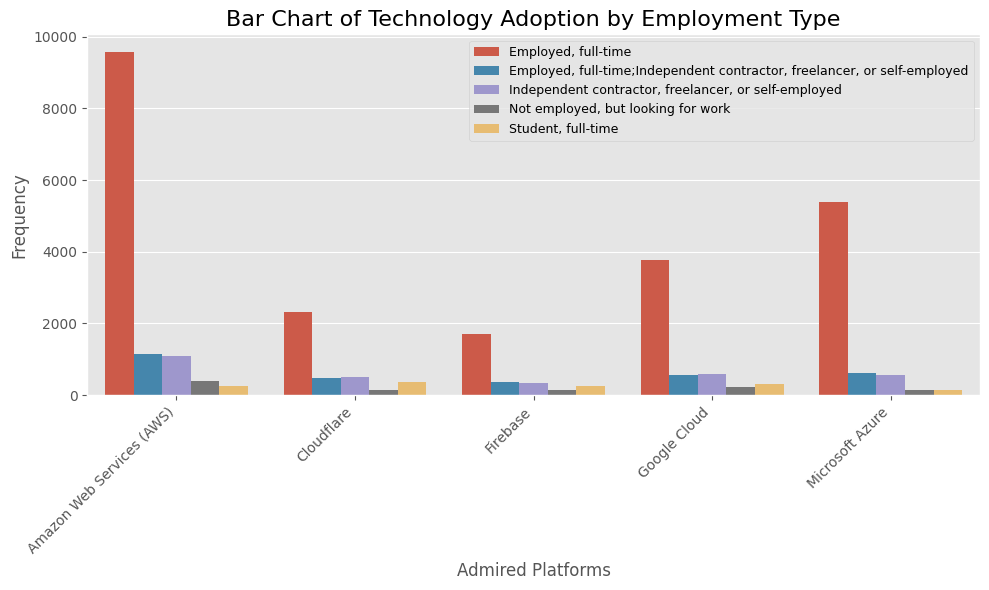

In [ ]:
##Write your code here
#fetch data
df_platform_emp = df.dropna(subset=['PlatformAdmired', 'Employment']).copy()
df_platform_emp['Platform'] = df_platform_emp['PlatformAdmired'].str.split(';')
df_platform_emp = df_platform_emp.explode('Platform')
top_5_platforms = df_platform_emp['Platform'].value_counts().head().index.tolist()
top_5_emp = df_platform_emp['Employment'].value_counts().head().index.tolist()
df_platform_count = df_platform_emp[df_platform_emp['Platform'].isin(top_5_platforms) & df_platform_emp['Employment'].isin(top_5_emp)]
df_platform_counts = df_platform_count.groupby(['Employment', 'Platform']).size().reset_index(name='Frequency')

#plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(
    data=df_platform_counts,
    x='Platform',
    y= 'Frequency',
    hue='Employment',
    legend='auto')
plt.title('Bar Chart of Technology Adoption by Employment Type', fontsize=16)
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签，避免重叠
plt.xlabel('Admired Platforms')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right',
        fontsize=9, #handlelength=0.8,  #
    # handleheight=0.9,
    # markerscale=0.7
)
plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
